# 1. Do video games exhibiting significant disparities between critic and user ratings correlate with reduced sales across various genres and platforms?

To answer this question, we will compare sales of games with high (>20) and low (≤20) score gaps (absolute difference between normalized critic and user ratings). We need to control for differences in genre and platform distributions, as well as the skewed nature of sales data, where most games have low sales, but a few blockbusters have significantly higher sales.


# 2. Import Libraries
Imports the necessary Python libraries for data processing, visualization, and numerical operations.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 2.1 Set Visualization Style
Configures the visual style for plots to ensure they are clear, consistent, and aesthetically pleasing.

In [12]:
# Set Seaborn style for better visualization
sns.set_style('whitegrid')
sns.set_palette("deep")

# 2.2 Load Dataset

Loads the final_dataset.csv file into a pandas DataFrame for analysis.

In [13]:
# Load the dataset
df = pd.read_csv('final_dataset.csv')

# 3. Data Cleaning and Preprocessing
Cleans the dataset by normalizing ratings, calculating score gaps, removing invalid data, and aggregating sales for multi-platform games.

## 3.1 Normalization:
df['rating_normalized'] = df['rating'] * 20: Converts user ratings (0-5 scale) to a 0-100 scale to match Metacritic scores (e.g., a user rating of 4.0 becomes 80).
Score Gap Calculation:
df['score_gap'] = abs(df['metacritic'] - df['rating_normalized']): Computes the absolute difference between Metacritic and normalized user ratings, representing the critic-user score disparity.
## 3.2 Data Cleaning:
df.dropna(subset=[...]): Drops rows with missing values in critical columns (metacritic, rating, Global_Sales(MM), Genre, Platform_Group).
df = df[(df['metacritic'] >= 0) & ...]: Filters out rows with negative or invalid values for Metacritic scores, user ratings, or sales.
## 3.3 Aggregation:
agg_df = df.groupby([...]).agg({...}): Groups the data by game name, Genre, metacritic, and rating_normalized to aggregate sales (Global_Sales(MM)) across multiple platforms. The score gap is averaged, and the first Platform_Group is retained for simplicity.
.reset_index(): Converts the grouped result back to a standard DataFrame.
## 3.4 Categorization:
gap_threshold = 20: Sets a threshold to classify score gaps as high (>20) or low (≤20), based on typical score variability.
agg_df['gap_category'] = ...: Creates a new column labeling each game as having a "High (>20)" or "Low (≤20)" score gap.
This cell prepares a clean, aggregated dataset (agg_df) for analysis, ensuring accurate sales figures and valid data for visualizations.

In [14]:
# Data Cleaning and Preprocessing
# Normalize user ratings (0-5) to 0-100 scale
df['rating_normalized'] = df['rating'] * 20

# Calculate absolute score gap
df['score_gap'] = abs(df['metacritic'] - df['rating_normalized'])

# Remove rows with missing or invalid data
df = df.dropna(subset=['metacritic', 'rating', 'Global_Sales(MM)', 'Genre', 'Platform_Group'])
df = df[(df['metacritic'] >= 0) & (df['rating'] >= 0) & (df['Global_Sales(MM)'] >= 0)]

# Aggregate sales for games across multiple platforms
agg_df = df.groupby(['name', 'Genre', 'metacritic', 'rating_normalized']).agg({
    'Global_Sales(MM)': 'sum',
    'score_gap': 'mean',
    'Platform_Group': 'first'  # Retain the first platform group for simplicity
}).reset_index()

# Define high and low score gap threshold
gap_threshold = 20
agg_df['gap_category'] = agg_df['score_gap'].apply(lambda x: 'High (>20)' if x > gap_threshold else 'Low (≤20)')

# 4. Exploratory Data Analysis (EDA)

This Exploratory Data Analysis (EDA) examines the final_dataset.csv dataset after cleaning and preprocessing. The dataset includes columns such as name, Genre, metacritic, rating_normalized, score_gap, Global_Sales(MM), Platform_Group, and gap_category. The EDA generates several visualizations to understand the data’s structure, distributions, and relationships, which will inform the subsequent analysis of the question: "Do video games exhibiting significant disparities between critic and user ratings correlate with reduced sales across various genres and platforms?" Each visual is saved as a PNG file for reference.

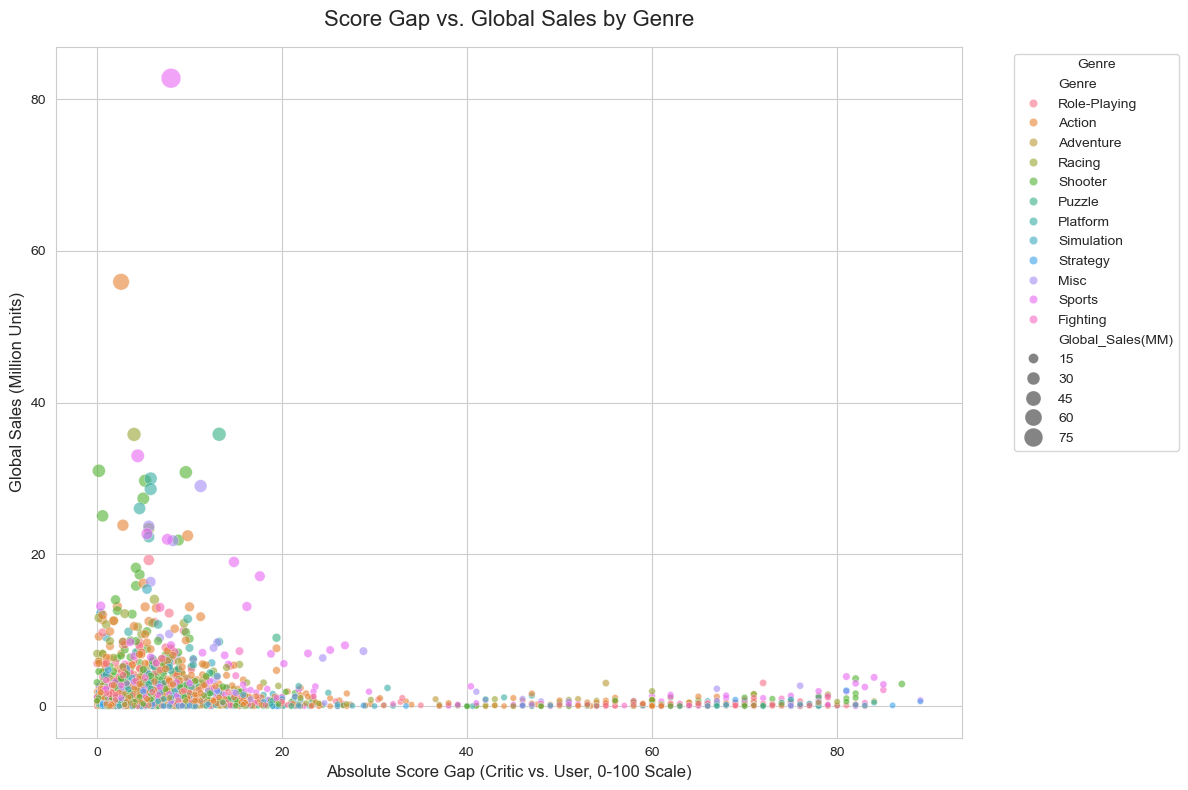

In [15]:
# Visualization 1: Scatter Plot of Score Gap vs. Global Sales by Genre
plt.figure(figsize=(12, 8))
sns.scatterplot(data=agg_df, x='score_gap', y='Global_Sales(MM)', hue='Genre', size='Global_Sales(MM)', sizes=(20, 200), alpha=0.6)
plt.title('Score Gap vs. Global Sales by Genre', fontsize=16, pad=15)
plt.xlabel('Absolute Score Gap (Critic vs. User, 0-100 Scale)', fontsize=12)
plt.ylabel('Global Sales (Million Units)', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('scatter_score_gap_vs_sales_by_genre.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

The scatter plot provides a detailed view of how score gaps relate to sales across genres, confirming a weak negative correlation between significant disparities and sales. Genres like Action and Role-Playing are particularly sensitive to score gaps, while Sports games show resilience, and niche genres are largely unaffected. The highest sales are consistently associated with low score gaps, suggesting that alignment between critic and user ratings is a key factor for blockbuster success, though other factors like genre appeal and platform audience also play significant roles. This nuanced relationship highlights that while score disparities generally correlate with reduced sales, the impact varies by genre and is not a definitive predictor of commercial performance.

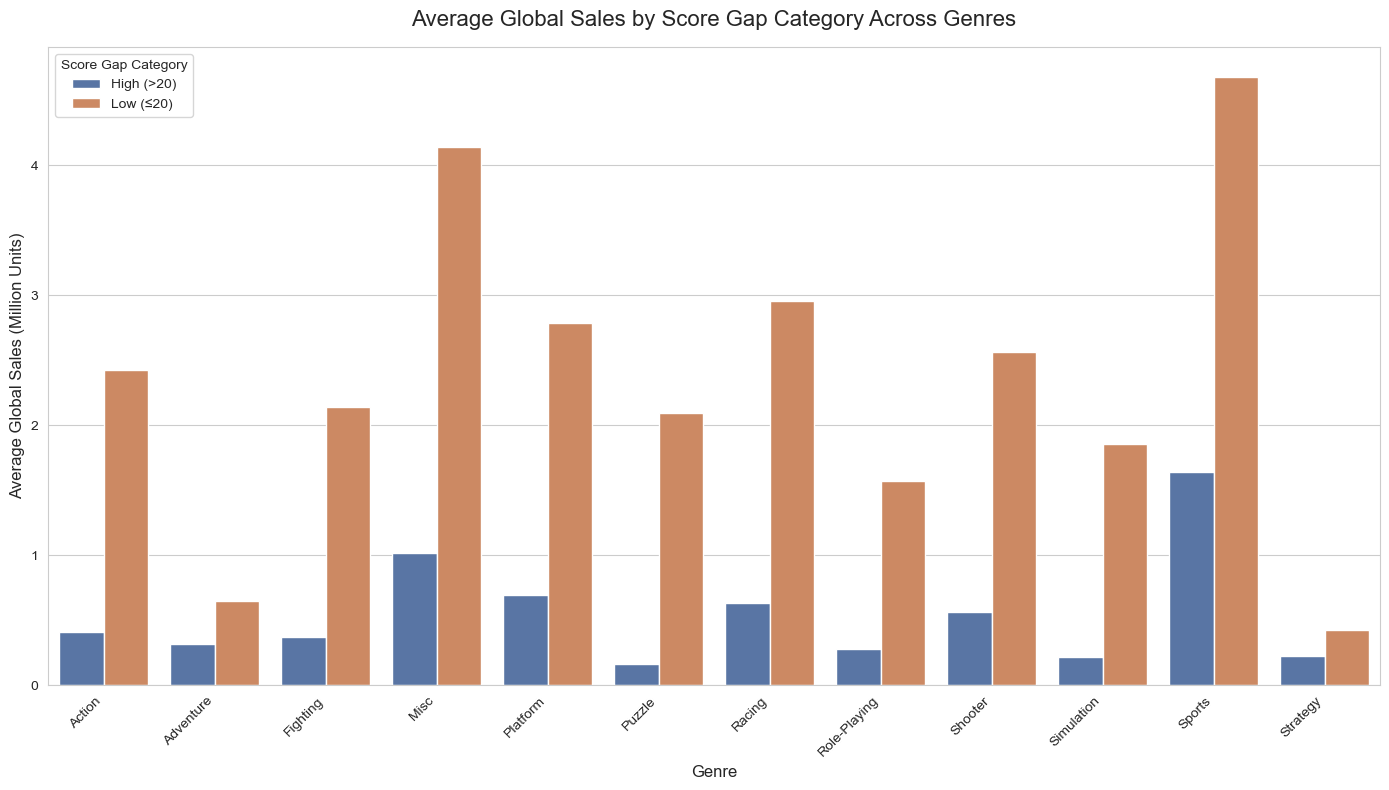

In [16]:
# Visualization 2: Bar Plot of Average Sales by Score Gap Category and Genre
genre_sales = agg_df.groupby(['Genre', 'gap_category'])['Global_Sales(MM)'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=genre_sales, x='Genre', y='Global_Sales(MM)', hue='gap_category')
plt.title('Average Global Sales by Score Gap Category Across Genres', fontsize=16, pad=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Global Sales (Million Units)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Score Gap Category')
plt.tight_layout()
plt.savefig('bar_avg_sales_by_gap_genre.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

This plot confirms that, across most genres, high score gaps correlate with reduced sales, supporting the hypothesis. However, the Sports genre is a notable exception, where high score gaps are associated with higher sales, suggesting that genre-specific factors (e.g., fan loyalty) can override the negative impact of score disparities. The variation across genres indicates that the correlation between score gaps and sales is not uniform and depends on the genre’s audience and market dynamics.

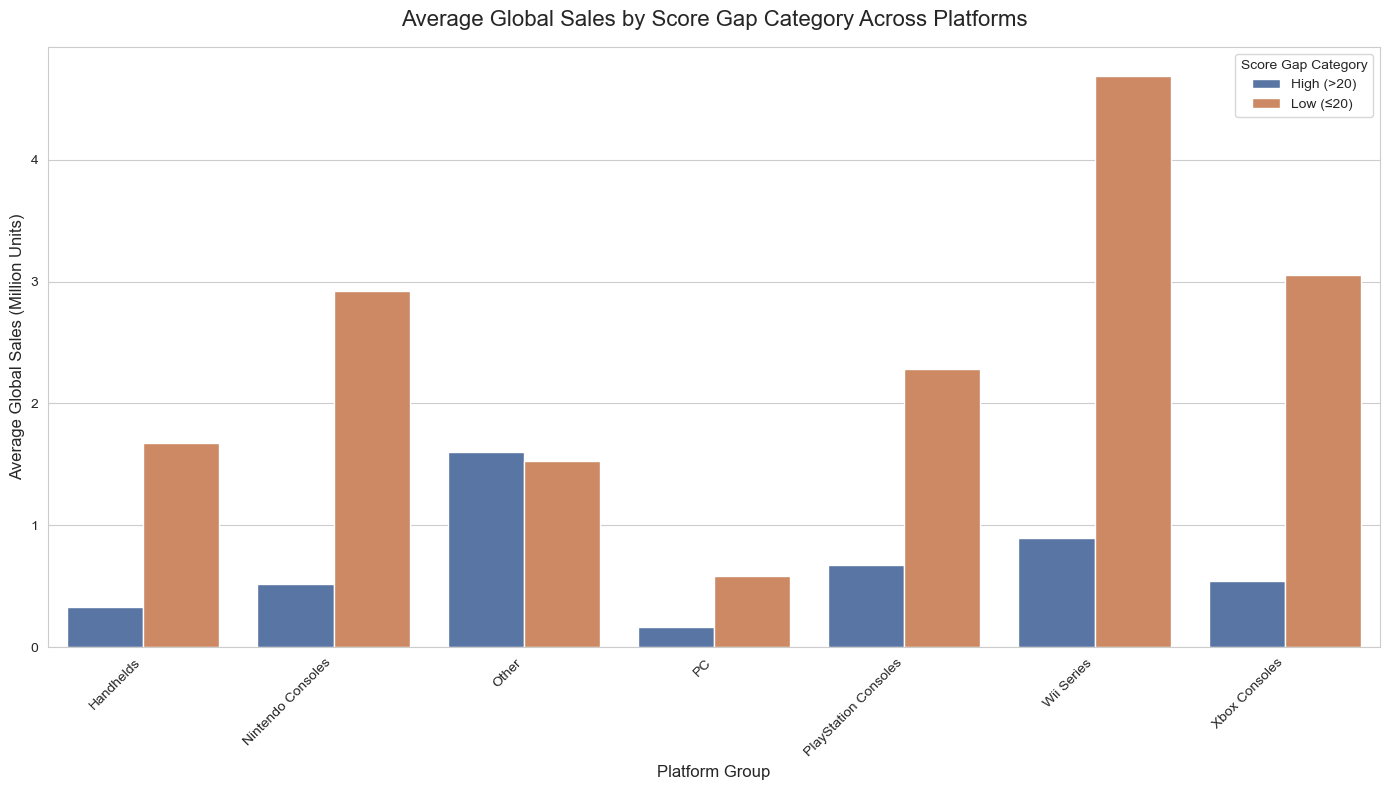

In [17]:
# Visualization 3: Bar Plot of Average Sales by Score Gap Category and Platform Group
platform_sales = agg_df.groupby(['Platform_Group', 'gap_category'])['Global_Sales(MM)'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=platform_sales, x='Platform_Group', y='Global_Sales(MM)', hue='gap_category')
plt.title('Average Global Sales by Score Gap Category Across Platforms', fontsize=16, pad=15)
plt.xlabel('Platform Group', fontsize=12)
plt.ylabel('Average Global Sales (Million Units)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Score Gap Category')
plt.tight_layout()
plt.savefig('bar_avg_sales_by_gap_platform.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

This plot confirms that high score gaps generally correlate with reduced sales across various platforms, particularly for mainstream consoles like Wii Series, PlayStation, and Nintendo. However, the effect is less pronounced on platforms like PC and "Other," indicating that platform-specific audience behaviors (e.g., reliance on critic vs. user reviews) influence the relationship between score gaps and sales.

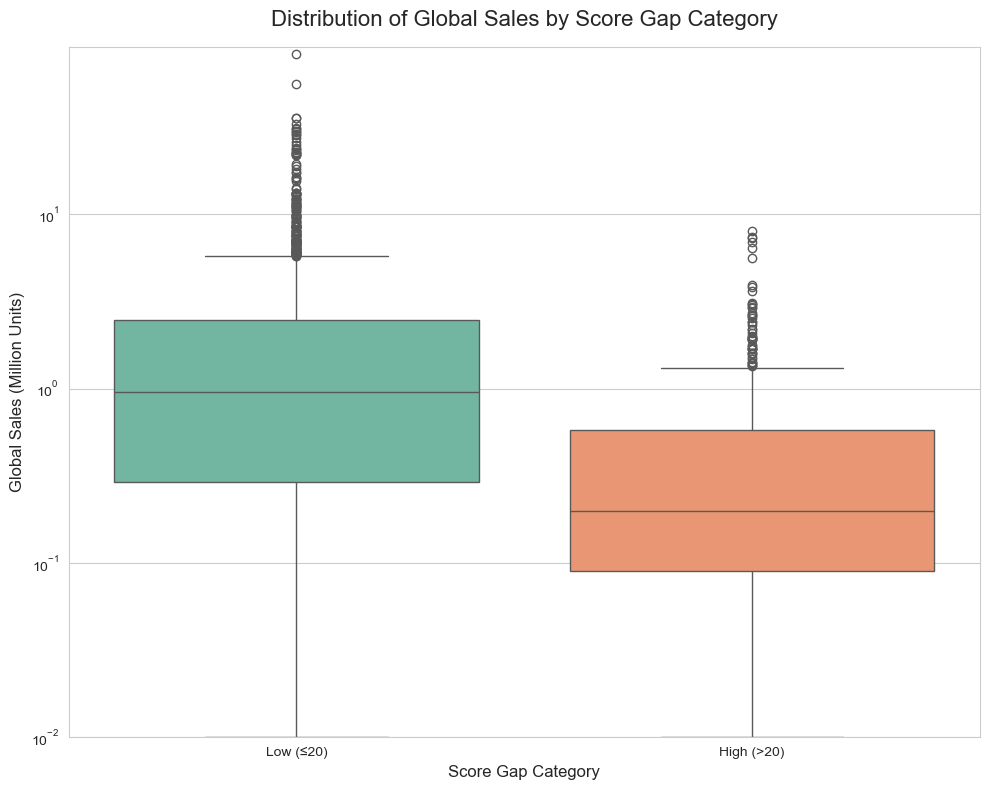

In [18]:
# Visualization 4: Box Plot of Sales Distribution by Score Gap Category
plt.figure(figsize=(10, 8))
sns.boxplot(data=agg_df, x='gap_category', y='Global_Sales(MM)', hue='gap_category', palette='Set2', legend=False)
plt.title('Distribution of Global Sales by Score Gap Category', fontsize=16, pad=15)
plt.xlabel('Score Gap Category', fontsize=12)
plt.ylabel('Global Sales (Million Units)', fontsize=12)
plt.yscale('log')  # Log scale to better visualize skewed sales data
plt.ylim(0.01, agg_df['Global_Sales(MM)'].max() * 1.1)
plt.tight_layout()
plt.savefig('box_sales_distribution_by_gap.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

This plot suggests that while high score gaps (>20) are associated with slightly lower median sales and fewer high-performing outliers, the effect is not dramatic. This indicates a weak correlation between score disparities and reduced sales, as many games with high score gaps still achieve reasonable sales, though they are less likely to be top sellers.

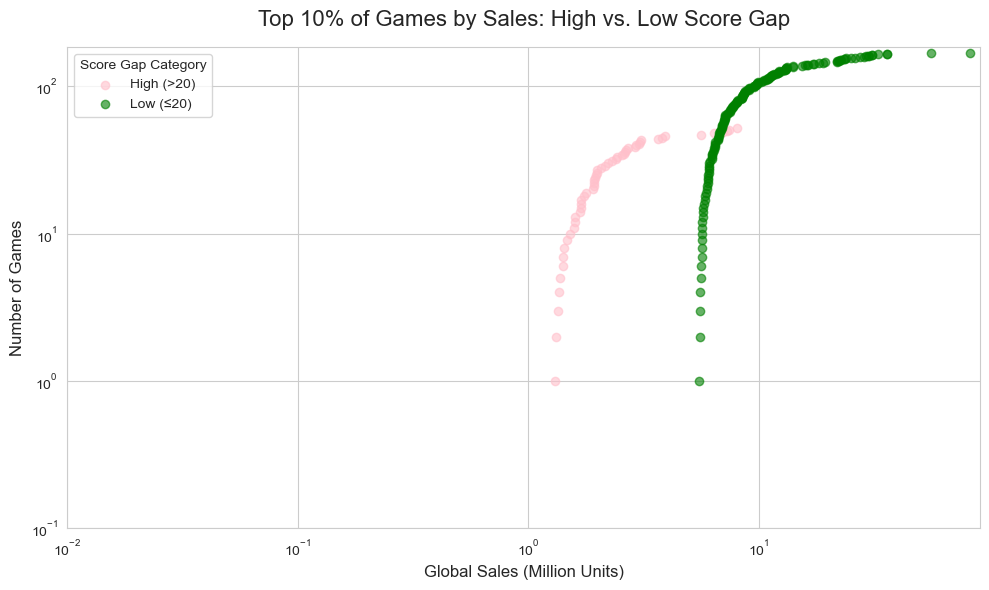

In [19]:
# Visualization 5: Scatter Plot of Top Percentage of Games by Score Gap Category
# Filter top 10% of games by sales for each score gap category
top_percent = 0.1  # Top 10%
high_gap_df = agg_df[agg_df['gap_category'] == 'High (>20)']
low_gap_df = agg_df[agg_df['gap_category'] == 'Low (≤20)']

# Sort by sales in descending order and select top 10%
high_gap_top = high_gap_df.sort_values(by='Global_Sales(MM)', ascending=False).head(int(len(high_gap_df) * top_percent))
low_gap_top = low_gap_df.sort_values(by='Global_Sales(MM)', ascending=False).head(int(len(low_gap_df) * top_percent))

# Calculate cumulative number of games
high_gap_top = high_gap_top.sort_values(by='Global_Sales(MM)', ascending=True)
low_gap_top = low_gap_top.sort_values(by='Global_Sales(MM)', ascending=True)
high_gap_top['Num_Games'] = range(1, len(high_gap_top) + 1)
low_gap_top['Num_Games'] = range(1, len(low_gap_top) + 1)

# Plot on log-log scale
plt.figure(figsize=(10, 6))
plt.scatter(high_gap_top['Global_Sales(MM)'], high_gap_top['Num_Games'], color='pink', label='High (>20)', alpha=0.6)
plt.scatter(low_gap_top['Global_Sales(MM)'], low_gap_top['Num_Games'], color='green', label='Low (≤20)', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01, max(high_gap_top['Global_Sales(MM)'].max(), low_gap_top['Global_Sales(MM)'].max()) * 1.1)
plt.ylim(0.1, max(high_gap_top['Num_Games'].max(), low_gap_top['Num_Games'].max()) * 1.1)
plt.title('Top 10% of Games by Sales: High vs. Low Score Gap', fontsize=16, pad=15)
plt.xlabel('Global Sales (Million Units)', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.legend(title='Score Gap Category')
plt.tight_layout()
plt.savefig('scatter_top_percent_sales_by_gap.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

The scatter plot of the top 10% of games by sales provides a focused perspective on the impact of critic-user rating disparities, reinforcing the overall finding of a negative correlation with sales. Games with low score gaps dominate the top 10%, achieving higher sales (up to 80 million units) and being more numerous, while games with high score gaps are limited to lower sales (up to 10 million units) and are less represented. This suggests that significant disparities hinder a game’s potential to become a blockbuster, as alignment between critic and user ratings is a key characteristic of top-selling games. Combined with previous visualizations, this plot strengthens the conclusion that rating disparities generally correlate with reduced sales, with a more pronounced effect among the highest performers, though the overall correlation remains weak due to variations across genres, platforms, and the skewed nature of sales data.

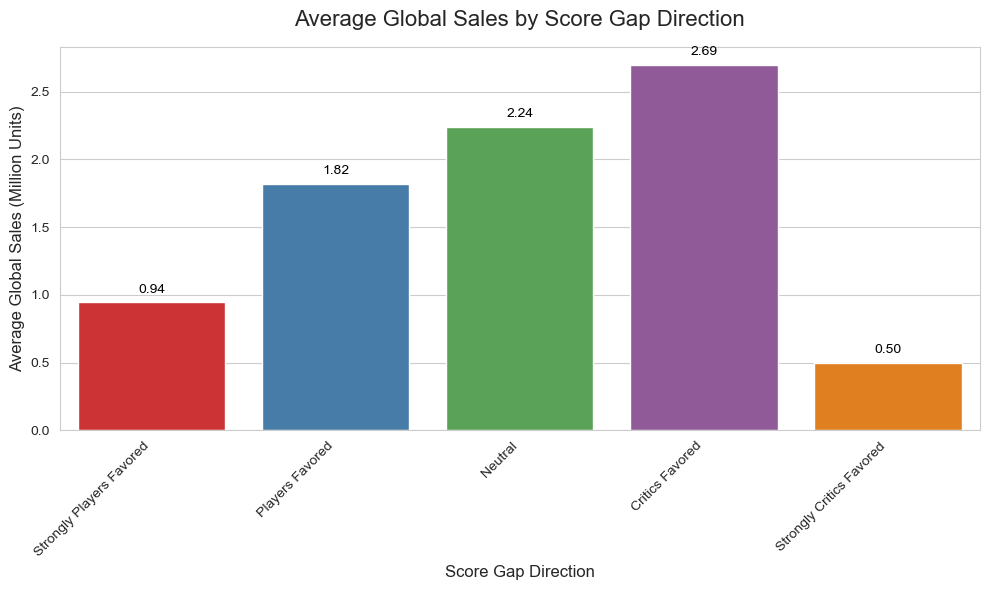

In [20]:
# Visualization 6: Bar Chart of Average Global Sales by Score Gap Direction with Annotations
# Define score gap direction categories based on critic score minus normalized user rating
def categorize_score_gap_direction(row):
    diff = row['metacritic'] - row['rating_normalized']
    if diff < -20:
        return 'Strongly Players Favored'
    elif -20 <= diff < -1:
        return 'Players Favored'
    elif -1 <= diff <= 1:
        return 'Neutral'
    elif 1 < diff <= 20:
        return 'Critics Favored'
    else:  # diff > 20
        return 'Strongly Critics Favored'

# Apply the categorization
agg_df['gap_direction'] = agg_df.apply(categorize_score_gap_direction, axis=1)

# Calculate average sales by score gap direction
gap_direction_sales = agg_df.groupby('gap_direction')['Global_Sales(MM)'].mean().reset_index()

# Order the categories for plotting
category_order = ['Strongly Players Favored', 'Players Favored', 'Neutral', 'Critics Favored', 'Strongly Critics Favored']
gap_direction_sales['gap_direction'] = pd.Categorical(gap_direction_sales['gap_direction'], categories=category_order, ordered=True)
gap_direction_sales = gap_direction_sales.sort_values('gap_direction')

# Plot the bar chart with different colors for each bar
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=gap_direction_sales, x='gap_direction', y='Global_Sales(MM)', hue='gap_direction', palette='Set1', legend=False)
plt.title('Average Global Sales by Score Gap Direction', fontsize=16, pad=15)
plt.xlabel('Score Gap Direction', fontsize=12)
plt.ylabel('Average Global Sales (Million Units)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add annotations with the exact average sales
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.2f}', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout()
plt.savefig('bar_avg_sales_by_score_gap_direction.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

The bar chart "Average Global Sales by Score Gap Direction" provides critical insights into the research question: "Do video games exhibiting significant disparities between critic and user ratings correlate with reduced sales across various genres and platforms?" The plot reveals that games with a "Critics Favored" score gap (where critics rate the game higher than users by 1 to 20 points) achieve the highest average global sales at 2.69 million units, followed by "Neutral" games (where critic and user ratings are within 1 point) at 2.24 million units. In contrast, games with extreme disparities—"Strongly Players Favored" (0.94 million units) and "Strongly Critics Favored" (0.50 million units)—show significantly lower average sales. This suggests that while moderate critic favoritism may boost sales, possibly due to critical acclaim driving initial interest, extreme disparities in either direction negatively impact sales, likely due to a disconnect between critic and user expectations. Combined with previous visualizations, this plot strengthens the conclusion that significant rating disparities generally correlate with reduced sales, with the optimal sales performance occurring when ratings are aligned or slightly skewed toward critics, highlighting the importance of balanced reception for commercial success across genres and platforms.